<a href="https://colab.research.google.com/github/qalhata/QTET_Day1/blob/main/QTechTraining_Day1_UseCase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import random
import datetime
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



In [ ]:
# Seaborn style and context
sns.set_style("white")
sns.set_context("paper")
sns.set_palette("Blues")
sns.set(font_scale=0.6)

# Matplotlib defaults
plt.rcParams['figure.figsize'] = [10, 6]  # Default figure size (width, height)
plt.rcParams['axes.titlesize'] = 12       # Default title size
plt.rcParams['axes.labelsize'] = 10       # Default label size for x and y axes
plt.rcParams['xtick.labelsize'] = 8       # Default x-tick label size
plt.rcParams['ytick.labelsize'] = 8       # Default y-tick label size

In [ ]:
# Generate synthetic traffic flow data
start_date = datetime.date(2023, 1, 1)
end_date = datetime.date(2023, 1, 7)
date_range = pd.date_range(start_date, end_date, freq='H')
traffic_data = {
    'Timestamp': date_range,
    'Traffic_Volume': [random.randint(100, 500) for _ in range(len(date_range))],
    'Congestion_Level': [random.uniform(0, 1) for _ in range(len(date_range))]
}
traffic_df = pd.DataFrame(traffic_data)

In [ ]:
# Generate synthetic demographic data
num_samples = 1000
age = [random.randint(18, 70) for _ in range(num_samples)]
income = [random.randint(20000, 100000) for _ in range(num_samples)]
transportation_mode = [random.choice(['Car', 'Public Transit', 'Cycling']) for _ in range(num_samples)]
demographic_data = {
    'Age': age,
    'Income': income,
    'Transportation_Mode': transportation_mode
}
demographic_df = pd.DataFrame(demographic_data)

In [ ]:
# Save data to CSV files
traffic_df.to_csv('traffic_flow_data.csv', index=False)
demographic_df.to_csv('demographic_data.csv', index=False)

**Sample Data Analysis**

In [ ]:
# Load data
traffic_df = pd.read_csv('traffic_flow_data.csv')
demographic_df = pd.read_csv('demographic_data.csv')

In [ ]:
traffic_df.head()

,Timestamp,Traffic_Volume,Congestion_Level
0,2023-01-01 00:00:00,346,0.604120
1,2023-01-01 01:00:00,387,0.629897
2,2023-01-01 02:00:00,120,0.526749
3,2023-01-01 03:00:00,441,0.657066
4,2023-01-01 04:00:00,255,0.081244


In [ ]:
demographic_df.head()

,Age,Income,Transportation_Mode
0,54,34956,Cycling
1,54,65273,Car
2,53,80886,Cycling
3,19,65714,Cycling
4,51,32928,Car


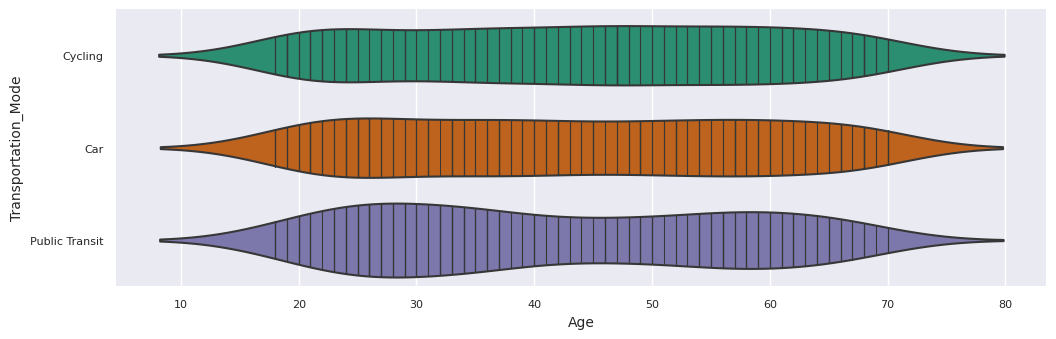

In [ ]:
# Distributions
figsize = (12, 1.2 * len(demographic_df['Transportation_Mode'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(demographic_df, x='Age', y='Transportation_Mode', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

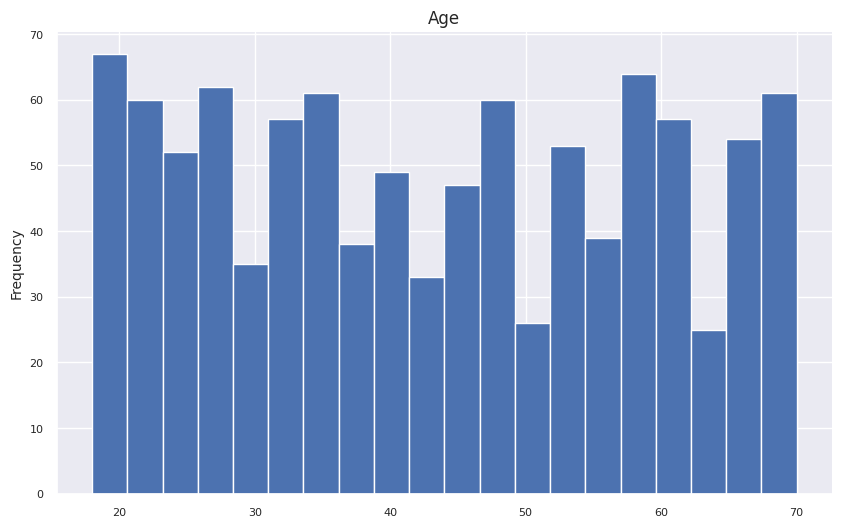

In [ ]:
# Plot 2

demographic_df['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

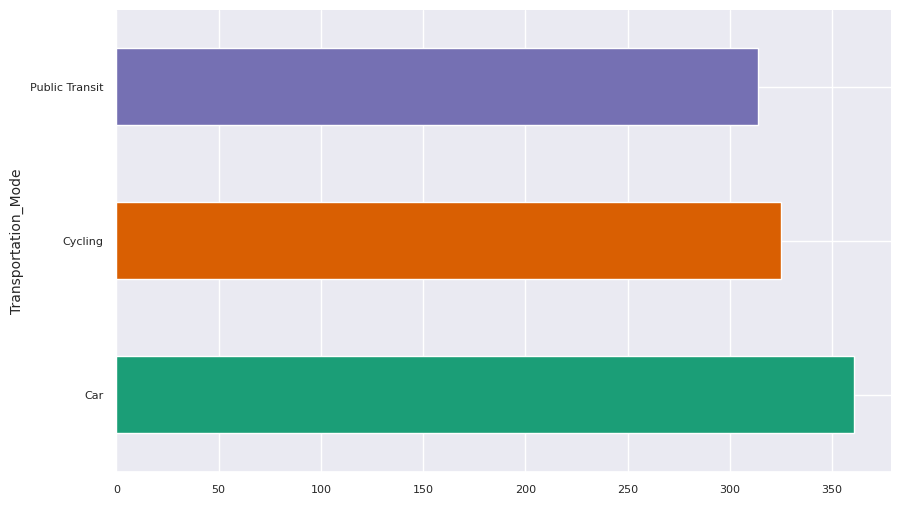

In [ ]:
# Plot 3

demographic_df.groupby('Transportation_Mode').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Convert 'Timestamp' column to datetime data type
traffic_df['Timestamp'] = pd.to_datetime(traffic_df['Timestamp'])

In [ ]:
# Analyze traffic congestion trends
average_congestion = traffic_df.groupby(traffic_df['Timestamp'].dt.dayofweek)['Congestion_Level'].mean()
print("Average Congestion Levels by Day of Week:")
print(average_congestion)

Average Congestion Levels by Day of Week:
Timestamp
0    0.460698
1    0.561031
2    0.450534
3    0.535340
4    0.446176
5    0.884400
6    0.411113
Name: Congestion_Level, dtype: float64


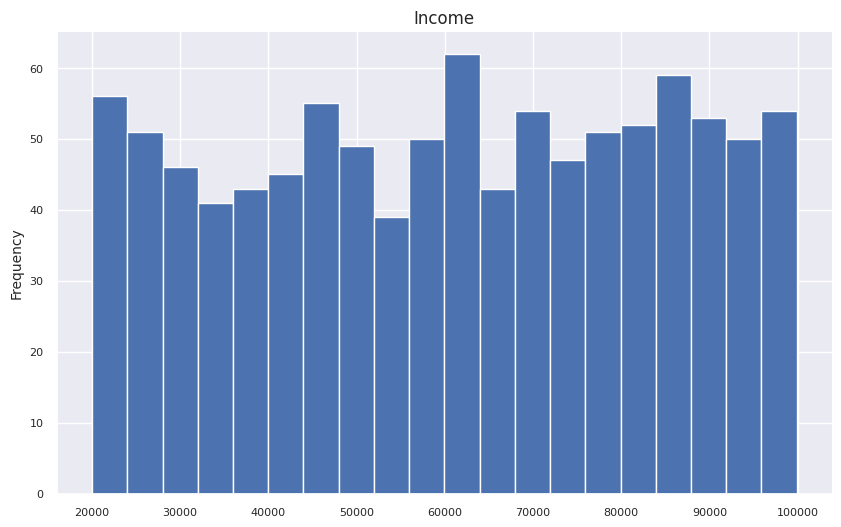

In [ ]:
# Plot 1
demographic_df['Income'].plot(kind='hist', bins=20, title='Income')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Explore the impact of transportation mode on traffic
mode_traffic = demographic_df.groupby('Transportation_Mode')['Age'].count()
print("Transportation Mode Distribution:")
print(mode_traffic)

Transportation Mode Distribution:
Transportation_Mode
Car               361
Cycling           325
Public Transit    314
Name: Age, dtype: int64


In [ ]:
# Simulate policy recommendations based on data
if average_congestion[0] > average_congestion[4]:
    print("Recommendation: Implement congestion pricing during weekdays.")
else:
    print("Recommendation: Invest in public transit infrastructure and promote carpooling.")

Recommendation: Implement congestion pricing during weekdays.


In the following sections, we will demonstrate the use of two machine learning techniques for policy-making:
1. **Linear Regression** for traffic volume prediction
2. **Decision Trees** for predicting transportation mode preferences based on demographic data.

**Linear Regression for Traffic Volume Prediction:**

**Context:**

One of the policy goals is to predict future traffic volume accurately. Linear Regression can be used to model the relationship between historical traffic data and forecast future traffic volume.

In [ ]:
# Load traffic flow data
traffic_df = pd.read_csv('traffic_flow_data.csv')

In [ ]:
# Convert 'Timestamp' column to Unix timestamps (seconds since 1970)
traffic_df['Timestamp'] = pd.to_datetime(traffic_df['Timestamp']).astype(int) // 10**9

In [ ]:
# Prepare the data
X = traffic_df['Timestamp'].astype('int64').values.reshape(-1, 1)  # Convert timestamp to numeric
y = traffic_df['Traffic_Volume'].values



In [ ]:
# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X, y)



LinearRegression()

In [ ]:
# Predict future traffic volume
future_timestamps = pd.date_range('2023-01-08', '2023-01-14', freq='H')
future_X = (future_timestamps.astype(int) // 10**9).values.reshape(-1, 1)
traffic_volume_predictions = model.predict(future_X)


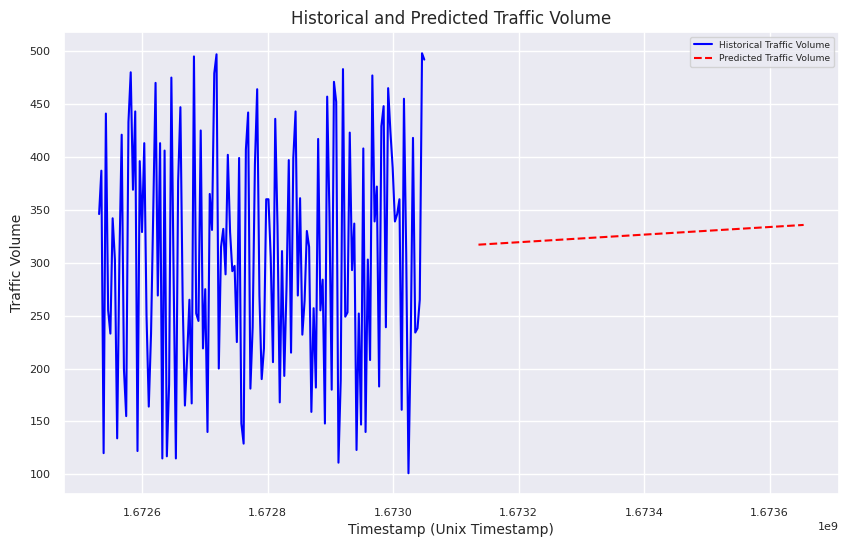

In [ ]:
# Plot historical and predicted traffic volume
plt.figure(figsize=(10, 6))
plt.plot(traffic_df['Timestamp'], traffic_df['Traffic_Volume'], label='Historical Traffic Volume', color='blue')
plt.plot(future_X, traffic_volume_predictions, label='Predicted Traffic Volume', color='red', linestyle='--')
plt.xlabel('Timestamp (Unix Timestamp)')
plt.ylabel('Traffic Volume')
plt.legend()
plt.title('Historical and Predicted Traffic Volume')
plt.grid(True)
plt.show()

In the context captured above, **Linear Regression** is used to predict future traffic volume based on historical data. The red dashed line represents the predicted traffic volume for the upcoming week.

**Decision Trees for Predicting Transportation Mode Preferences:**

**Context:**

To make informed policy decisions, it's important to understand the transportation mode preferences of the population. Decision Trees can be used to create a model that predicts the transportation mode based on demographic features.

In [ ]:
# The following imports are useful for the purpose of the next bit of analysis
#  However, it is good practice to always capture all necessary import statements
# at the beginning of the analysis script - They can become your requirements.txt
# ########### Import Statements for Decision Trees ###################

# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Using the demographic data loaded earlier, so no need to dfine again
# demographic_df = pd.read_csv('demographic_data.csv')

# Prepare the data
X = demographic_df[['Age', 'Income']]
y = demographic_df['Transportation_Mode']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=62)

# Create and train the Decision Tree classifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_text = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(confusion)
print("\nClassification Report:")
print(classification_report_text)

Accuracy: 0.34

Confusion Matrix:
[[27 29 30]
 [17 27 20]
 [15 20 15]]

Classification Report:
                precision    recall  f1-score   support

           Car       0.46      0.31      0.37        86
       Cycling       0.36      0.42      0.39        64
Public Transit       0.23      0.30      0.26        50

      accuracy                           0.34       200
     macro avg       0.35      0.35      0.34       200
  weighted avg       0.37      0.34      0.35       200



Precision, recall, F1-score, and support are important metrics used in classification problems, and they provide insights into the performance of a classification model. These metrics are beneficial when dealing with imbalanced datasets where one class significantly outnumbers the other.

The following discussion outlines what each of these metrics means:

**1. Precision:**
   - Precision measures the model's accuracy when it predicts a positive class. It answers the question: "Of all the instances the model predicted as positive, how many were positive?"
   - Formula: Precision = TP / (TP + FP)
   - TP: True Positives (correctly predicted positive instances)
   - FP: False Positives (instances incorrectly predicted as positive)

**2. Recall (Sensitivity or True Positive Rate):**
   - Recall measures the model's ability to identify all positive instances. It answers the question: "Of all the positive instances, how many did the model correctly predict?"
   - Formula: Recall = TP / (TP + FN)
   - FN: False Negatives (instances incorrectly predicted as negative)

**3. F1-Score:**
   - The F1-score is the harmonic mean of precision and recall. It provides a balance between accuracy and recall, making it useful when you want to consider both false positives and false negatives.
   - Formula: F1-Score = 2  (Precision  Recall) / (Precision + Recall)

**4. Support:**
   - Support is the number of actual class occurrences in the dataset. It can help you understand the distribution of the types.

Best practice thresholds for these metrics can vary depending on the specific problem and its requirements. Some guidelines for making decisions based on these values are as follows:

** Precision-Recall Trade-off: **

There's often a trade-off between precision and recall. Increasing precision might lower recall and vice versa. The choice between these metrics depends on the problem's context. For example, in medical diagnosis, high recall (identifying all positive cases, even if there are some false positives) might be more important than precision.

**F1-Score:**

If we need to balance precision and recall and require an easy way to choose a threshold, the F1-score is an excellent metric to consider. We can optimise the F1 score by selecting an appropriate threshold.

**Threshold Selection:**

The choice of threshold for classification decisions depends on the problem's requirements and the relative importance of precision and recall. We can adjust the threshold based on the application. For example, in a fraud detection system, one might lower the threshold to increase recall, catching more potential fraud at the cost of some false alarms.

**Domain Knowledge:**

The benefit of domain-specific knowledge and the consequences of false positives and negatives cannot be overstated. The best threshold often depends on the specific use case.

**NOTE**

There's no one-size-fits-all threshold, and the business or policy objectives should **always** drive the choice.
